Реализовать программу, которая позволяет: генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде кортежа кортежей (например: ((0,0), (0,1), (1,1), (1,0)) – представление для квадрата). Последовательности представлений полигонов представляют из себя итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля itertools и functools.

1.Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки matplotlib).
2.Реализовать функции, генерирующие бесконечную последовательность не пересекающихся полигонов с различающимися координатами (например, «ленту»):
прямоугольников ( gen_rectangle() );
треугольников ( gen_triangle() );
правильных шестиугольников ( gen_hexagon() ). С помощью данных функций, используя функции из модуля itertools, сгенерировать 7 фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.
3.Реализовать операции:
параллельный перенос ( tr_translate );
поворот ( tr_rotate );
симметрия ( tr_symmetry );
гомотетия ( tr_homothety ); которые можно применить к последовательности полигонов с помощью функции map.
4.С помощью данных функций создать и визуализировать:
три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси x;
две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;
две параллельных ленты треугольников, ориентированных симметрично друг к другу;
последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

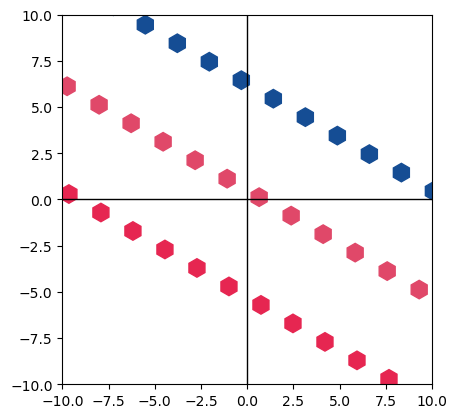

None


In [29]:
import itertools
import math
import random

import matplotlib.pyplot as plt
import matplotlib.path
import numpy as np


class Window:
    def __init__(self, size=10):
        self.main, self.ax = plt.subplots()
        self.size = size

        plt.axis('square')
        plt.xlim(-size, size)
        plt.ylim(-size, size)

        plt.plot((-2 * self.size, 2 * self.size), (0, 0), "k", linewidth=1)
        plt.plot((0, 0), (-2 * size, 2 * size), 'k', linewidth=1)
        

    def show(self):
        plt.show()


window = Window()

def draw_polygon(polygon, axes, colors='r'):
    poly = plt.Polygon(list(polygon), color=colors)
    axes.add_patch(poly)



def draw_polygons(polygons, limit=100):
    axes = plt.gca()
    polygons = itertools.islice(polygons, limit)
    
    """ Раскрасим полигоны в цвета!"""
    current_color = random.choice(['#611F2D', '#E62651', '#E04869', '#FFEBC6', '#154D94', '#23943C'])
    list(map(lambda elem: draw_polygon(elem, axes, colors=current_color), polygons))


def tr_translate(vector, polygon):
    return tuple(map(lambda point: (point[0] + vector[0], point[1] + vector[1]), polygon))


def gen_rectangle(base_rectangle=((0, 0), (0, 1), (1, 1), (1, 0)), start=0):
    return map(lambda x: tr_translate((x, 0), base_rectangle), itertools.count(start, 2))


def gen_triangle(base_triangle=((0, 0), (0.5, 1), (1, 0)), start=0):
    return map(lambda x: tr_translate((x, 0), base_triangle), itertools.count(start, 2))


def gen_hexagon(base_hexagon=((0, np.sqrt(3) / 4), (0.25, 0), (0.75, 0), (1, np.sqrt(3) / 4), (0.75, np.sqrt(3) / 2), (
        0.25, np.sqrt(3) / 2), (0, np.sqrt(3) / 4)), start=0):
    return map(lambda x: tr_translate((x, 0), base_hexagon), itertools.count(start, 2))


def tr_rotate(polygon, angle):
    M = [math.cos(angle), math.sin(angle),
         -math.sin(angle), math.cos(angle)]
    return tuple(map(lambda point: (point[0] * M[0] + point[1] * M[1], point[0] * M[2] + point[1] * M[3]), polygon))


def tr_symmetry(polygon, sym_point):
    return tuple(map(lambda point: ((sym_point[0] - point[0]) * 2 + point[0], (sym_point[1] - point[1]) * 2 + point[1]),
                     polygon))


def tr_homothety(polygon):
    c = 0.2
    return tuple(map(lambda point: (
        c * np.sqrt(point[0] ** 2 + point[1] ** 2) * point[0], c * np.sqrt(point[0] ** 2 + point[1] ** 2) * point[1]),
                     polygon))


def homothety(polygon, scale):
    return tuple(map(lambda point: ((point[0] * scale), (point[1] * scale)), polygon))


def task_2():
    """ Визуализровать ленты полигонов с различающимися координатами.
    Сгенерировать 7 фигур, включающих как прямоугольники,
    так и треугольники и шестиугольники, визуализировать результат."""

    draw_polygons(map(lambda elem: tr_translate((-9, 0), elem), gen_rectangle()))

    draw_polygons(map(lambda elem: tr_translate((-9, -5), elem), gen_triangle()))

    draw_polygons(map(lambda elem: tr_translate((-9, 5), elem), gen_hexagon()))

    triangles = itertools.islice(gen_triangle(start=1), 2)
    rectangles = itertools.islice(gen_rectangle(start=5), 2)
    hexagons = itertools.islice(gen_hexagon(start=9), 3)
    draw_polygons(map(lambda elem: tr_translate((-10, -9), elem), itertools.chain(triangles, rectangles, hexagons)))

    window.show()


def task_4_1():
    """Визуализировать 3 параллельных ленты из последовательностей полигонов,
    расположенных под острым углом к оси x."""

    draw_polygons(map(lambda elem: tr_rotate(elem, math.pi / 6), map(lambda elem: tr_translate((-9, -5), elem),
                                                                     gen_hexagon())))
    draw_polygons(map(lambda elem: tr_rotate(elem, math.pi / 6), map(lambda elem: tr_translate((-20, 0), elem),
                                                                     gen_hexagon())))
    draw_polygons(map(lambda elem: tr_rotate(elem, math.pi / 6), map(lambda elem: tr_translate((-40, 5), elem),
                                                                     gen_hexagon())))

    window.show()


def task_4_2():
    """Создание и визуализирование двух пересекающихся лент из последовательностей полигонов, пересекающихся не в
    начале координат. Шиндяйкин"""

    draw_polygons(map(lambda elem: tr_rotate(elem, math.pi / 6), map(lambda elem: tr_translate((-9, -5), elem),
                                                                     gen_triangle())))
    draw_polygons(map(lambda elem: tr_rotate(elem, 2 * math.pi / 3), map(lambda elem: tr_translate((-20, 0), elem),
                                                                         gen_triangle())))
    window.show()


def task_4_3():
    """ Визуализировать две параллельных ленты треугольников, ориентированных симметрично друг к другу.Шиндяйкин """
    draw_polygons(map(lambda elem: tr_symmetry(elem, (0, 0)), map(lambda elem: tr_translate((-10, -2.5), elem),
                                                                  gen_triangle())))
    draw_polygons(map(lambda elem: tr_translate((-9, 0), elem), gen_triangle()))






print (task_4_1())
window.show()
#print(list(itertools.islice(gen_rectangle(), 5)))
#
#print(list(itertools.islice(gen_triangle(), 5)))
